In [6]:
from pathlib import Path

from au2v.config import ModelConfig, TrainerConfig
from au2v.dataset_manager import load_dataset_manager
from au2v.trainer import PyTorchTrainer
from au2v.analyst import Analyst
from au2v.model import load_model

In [7]:
# 設定
model_config = ModelConfig()
trainer_config = TrainerConfig()

In [8]:
# データセットのロード
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

# 自分でデータセットを作る場合
# `RawDataset`の作り方は`dataset.RawDataset`のコメントを参照
# dataset = dataset.RawDataset(
#     ...
# )
# dataset_manager = DatasetManager(
#     dataset=dataset,
#     window_size=model_config.window_size
# )

dataset_manager does not exist at: cache/dataset/toydata-small.pickle, create dataset
num_seq: 500, num_item: 45, num_item_meta: 8, num_seq_meta: 7, num_item_meta_types: 2, num_seq_meta_types: 2
to_sequential_data start


100%|██████████| 500/500 [00:00<00:00, 15305.44it/s]


to_sequential_data end
to_sequential_data start


100%|██████████| 500/500 [00:00<00:00, 16449.03it/s]

to_sequential_data end
dumping dataset_manager to: cache/dataset/toydata-small.pickle
dumped dataset_manager to: cache/dataset/toydata-small.pickle


In [9]:
# modelの作成
model = load_model(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config
)

In [10]:
# Trainerの作成
trainer = PyTorchTrainer(
    model=model,
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

In [11]:
# モデルの学習
trainer.fit()

train start


100%|██████████| 71/71 [00:00<00:00, 136.00it/s]


Epoch: 1, loss: 0.005900349245000053, test_loss: {'test': 0.005835460380874049}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 157.55it/s]


Epoch: 2, loss: 0.0058103942732051226, test_loss: {'test': 0.00573948706487115}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 149.74it/s]

Epoch: 3, loss: 0.00571345879604489, test_loss: {'test': 0.0056461378682772035}
saved best model to cache/model/toydata-small/best-attentive.pt
train end
saved model to cache/model/toydata-small/attentive.pt


{'train': [0.005900349245000053, 0.0058103942732051226, 0.00571345879604489],
 'test': [0.005835460380874049, 0.00573948706487115, 0.0056461378682772035]}

In [12]:
# Analyst（モデルの出力を分析するクラス）インスタンスの作成
analyst = Analyst(model, dataset_manager)

In [13]:
# 系列と要素の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item(seq_index=0, num_recent_items=10)

,similarity,item
0,0.549167,v_2_F_2000
1,0.549167,v_2_F_2000
2,0.549167,v_2_F_2000
3,0.549167,v_2_F_2000
4,0.525343,v_1_F_1970
5,-0.278191,v_2_E_1960
6,-0.510978,v_1_E_2000
7,-0.510978,v_1_E_2000
8,-0.546763,v_2_E_1980
9,-1.022017,v_2_M_2000


In [14]:
# 系列と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item_meta(seq_index=0, item_meta_name="genre")

,similarity,item_meta
0,0.238348,genre:E
1,-0.406619,genre:M
2,-0.595285,genre:F


In [15]:
# 系列の補助情報と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_meta_and_item_meta("gender", "M", "genre")

,similarity,item_meta
0,0.245904,genre:E
1,-0.003645,genre:F
2,-0.261237,genre:M


In [16]:
# 系列と要素の固有の特徴と補助情報の関連性（デフォルトだと内積）の出力
analyst.analyze_seq(seq_index=0)

,similarity,seq,item
0,0.716744,gender:F,genre:M
1,0.526177,gender:F,year:2000
2,0.350325,gender:F,year:1960
3,0.238348,u_0_F_20_20_F1,genre:E
4,0.203482,gender:F,year:1990
5,0.132814,gender:F,year:1980
6,0.059319,u_0_F_20_20_F1,year:1970
7,0.006187,age:20,genre:F
8,-0.015210,u_0_F_20_20_F1,year:1960
9,-0.077326,age:20,genre:E


(<Figure size 800x400 with 2 Axes>, <AxesSubplot: >)

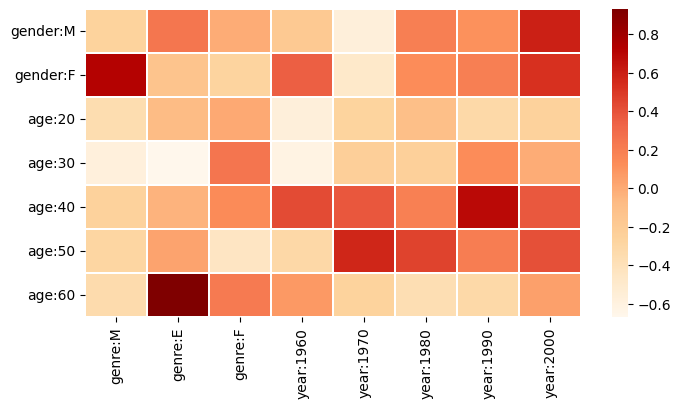

In [17]:
# 補助情報のヒートマップの作成
seq_meta_names = ["gender:M", "gender:F", "age:20", "age:30", "age:40", "age:50", "age:60"]
item_meta_names = ["genre:M", "genre:E", "genre:F", "year:1960", "year:1970", "year:1980", "year:1990", "year:2000"]
analyst.visualize_similarity_heatmap(seq_meta_names, item_meta_names, figsize=(8, 4))